In [ ]:
#imports
import pandas as pd
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.metrics import coverage_error
from sklearn.metrics import label_ranking_average_precision_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics
from nltk import word_tokenize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Data preparation

In [ ]:
# Let's us read the input data
df = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

df = df.astype(str)
dftest = dftest.astype(str)

df.head()


,descripcion,CPV
0,"""Contracte de subministrament per a l'adquisic...",35120000
1,"""Ejecución de obras de almacén en el CEIP San ...","45000000,45213220,45210000,45213000,45200000,4..."
2,"""Servicio para la elaboración de un inventario...","50312310,50330000"
3,"""Reforma de la Instalación de Alumbrado Públic...","45316000,45315600,45310000"
4,"""Mejora de la Accesibilidad del CEIP José Gil ...",45210000


In [ ]:
# We delete instances without any CPV

df = df.loc[~df["CPV"].str.contains("na")]
dftest = dftest.loc[~dftest["CPV"].str.contains("na")]


In [ ]:
df.shape

(163080, 2)

In [ ]:
dftest.shape

(69868, 2)

In [ ]:
#df = df.sample(frac=0.10, random_state=42)
#dftest = dftest.sample(frac=0.10, random_state=42)

In [ ]:
df.shape

(16308, 2)

In [ ]:
dftest.shape

(6987, 2)

In [ ]:
# We transform the class column for multilabel purposes and take the first two digits
dfy = []
for ind,row in df.iterrows():
  dfy.append(list(set([x[0:2] for x in df.at[ind,'CPV'].split(",")])))


dfytest = []
for ind,row in dftest.iterrows():
  dfytest.append(list(set([x[0:2] for x in dftest.at[ind,'CPV'].split(",")])))


In [ ]:
mlbin = MultiLabelBinarizer()
y_train = mlbin.fit_transform(dfy)

y_test = mlbin.transform(dfytest)

In [ ]:
print(mlbin.classes_)
labels = mlbin.classes_

['03' '09' '14' '15' '16' '18' '19' '22' '24' '30' '31' '32' '33' '34'
 '35' '37' '38' '39' '41' '42' '43' '44' '45' '48' '50' '51' '55' '60'
 '63' '64' '65' '66' '70' '71' '72' '73' '75' '76' '77' '79' '80' '85'
 '90' '92' '98']


In [ ]:
print(y_train)
y_train.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(163080, 45)

In [ ]:
df['CPV2'] = dfy

In [ ]:
df.head()

,descripcion,CPV,CPV2
0,"""Contracte de subministrament per a l'adquisic...",35120000,[35]
1,"""Ejecución de obras de almacén en el CEIP San ...","45000000,45213220,45210000,45213000,45200000,4...",[45]
2,"""Servicio para la elaboración de un inventario...","50312310,50330000",[50]
3,"""Reforma de la Instalación de Alumbrado Públic...","45316000,45315600,45310000",[45]
4,"""Mejora de la Accesibilidad del CEIP José Gil ...",45210000,[45]


In [ ]:
from collections import Counter

sorted_dict = dict( sorted(Counter([item for sublist in dfy for item in sublist]).items(),
                           key=lambda item: item[1],
                           reverse=True))
print(sorted_dict)

{'45': 35361, '50': 13006, '79': 12579, '71': 9283, '72': 8404, '90': 7894, '34': 7643, '85': 7584, '92': 6870, '33': 5706, '44': 4947, '30': 4610, '55': 4468, '39': 4077, '48': 3969, '31': 3501, '60': 3356, '80': 3350, '09': 3189, '66': 3141, '42': 3098, '98': 2732, '38': 2645, '35': 2435, '32': 2215, '77': 2003, '18': 1970, '63': 1759, '15': 1750, '64': 1745, '03': 1307, '37': 1190, '24': 1160, '22': 1145, '51': 1064, '70': 883, '14': 862, '73': 600, '43': 595, '75': 575, '65': 465, '16': 362, '19': 301, '41': 97, '76': 31}


In [ ]:
from collections import Counter

sorted_dicttest = dict( sorted(Counter([item for sublist in dfytest for item in sublist]).items(),
                           key=lambda item: item[1],
                           reverse=True))
print(sorted_dicttest)

{'45': 15066, '50': 5564, '79': 5502, '71': 4034, '72': 3661, '90': 3291, '34': 3264, '85': 3199, '92': 2870, '33': 2398, '44': 2111, '30': 2017, '55': 1847, '39': 1768, '48': 1706, '31': 1556, '60': 1478, '09': 1405, '80': 1383, '66': 1360, '42': 1345, '38': 1181, '98': 1134, '35': 1058, '32': 988, '18': 888, '77': 863, '15': 797, '64': 749, '63': 712, '03': 566, '37': 506, '22': 501, '24': 499, '51': 470, '70': 370, '14': 353, '73': 299, '75': 252, '43': 235, '65': 199, '16': 159, '19': 132, '41': 33, '76': 15}


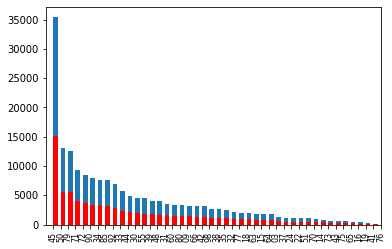

In [ ]:
import matplotlib.pyplot as plt

x_pos=range(40,46*40,40)
bars = list(sorted_dict.keys())
height = sorted_dict.values()

plt.bar(x_pos, height, align='edge', width=25)
plt.bar(x_pos, sorted_dicttest.values(), color='r', align='edge', width=25)

plt.xlim(0,1500)

#plt.gca().axes.get_xaxis().set_visible(False)

plt.xticks(rotation='vertical',fontsize=8)

plt.xticks(x_pos, bars)
plt.savefig('plot.pdf')

plt.show()



In [ ]:
y_train.shape

(16308, 45)

In [ ]:
y_test.shape

(6987, 45)

In [ ]:
X_train = df['descripcion']
X_test = dftest['descripcion']
X_train

143131          "Adquisición de un sistema de alta presión"
157894    "Servicio de transporte adaptado de personas u...
104629    "Servicio de asistencia a personas mayores a c...
91        "Suministro de insignias de condecoraciones de...
113864    "Suministro de cestas de Navidad para los empl...
                                ...                        
104007    "Obras de renovación de redes en Campohermoso,...
54749     "La obra consiste en la rehabilitación de una ...
123422    "Servicio de desarrollo e aplicaciones informá...
14602     "Acuerdo Marco para el suministro de vivieres ...
56214          "Gestión del Servicio de Matadero Municipal"
Name: descripcion, Length: 16308, dtype: object

# Models

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import coverage_error
from sklearn.metrics import label_ranking_average_precision_score
    
# adapted from: https://jesusleal.io/2021/04/21/Longformer-multilabel-classification/
def multi_label_metrics(ytest,y_pred):
    # finally, compute metrics
    y_true = ytest
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    coverage_err = coverage_error(y_test, y_pred)
    label_ranking_average_precision = label_ranking_average_precision_score(y_test, y_pred)
    # return as dictionary
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy,
               'coverage_error': coverage_err,
               'label_ranking_average_precision_score': label_ranking_average_precision}
    return metrics

In [ ]:
tfidf_tree = Pipeline([
     ('vectorizer', TfidfVectorizer(ngram_range=(1,3),
                                   analyzer="word",
                                   max_features=None,
                                   stop_words=stopwords.words('spanish'),
                                   use_idf=True,
                                   lowercase=True)),
    ('tree', DecisionTreeClassifier(random_state=42))
])

tfidf_tree.fit(X_train, y_train)
ypred = tfidf_tree.predict(X_test)

print(f'tfidf_tree:')	

print(multi_label_metrics(y_test, ypred))


tfidf_tree:
{'f1': 0.5883642930856553, 'roc_auc': 0.7808739383012103, 'accuracy': 0.5654787462430227, 'coverage_error': 19.40389294403893, 'label_ranking_average_precision_score': 0.6030579517805906}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

tfidf_knn = Pipeline([
     ('vectorizer', TfidfVectorizer(ngram_range=(1,3),
                                   analyzer="word",
                                   max_features=None,
                                   stop_words=stopwords.words('spanish'),
                                   use_idf=True,
                                   lowercase=True)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

tfidf_knn.fit(X_train, y_train)
ypred = tfidf_knn.predict(X_test)

#ypredprob = tfidf_knn.predict_proba(X_test)
#print(ypredprob)

print(f'tfidf_knn:')	
print(multi_label_metrics(y_test, ypred))

tfidf_knn:
{'f1': 0.5539098582576844, 'roc_auc': 0.7160736141932843, 'accuracy': 0.44940603978817806, 'coverage_error': 25.026334621439815, 'label_ranking_average_precision_score': 0.48348946745255206}


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


tfidf_NB = Pipeline([
   ('vectorizer', TfidfVectorizer(ngram_range=(1,3),
                                   analyzer="word",
                                   max_features=None,
                                   stop_words=stopwords.words('spanish'),
                                   use_idf=True,
                                   lowercase=True)),
    ('nb', OneVsRestClassifier(MultinomialNB()))
])


tfidf_NB.fit(X_train, y_train)
ypred2 = tfidf_NB.predict(X_test)

print(f'tfidf_nb:')	

print(multi_label_metrics(y_test, ypred2))

tfidf_nb:
{'f1': 0.12960580184816936, 'roc_auc': 0.5346818701196979, 'accuracy': 0.0762845284099041, 'coverage_error': 41.64348074996422, 'label_ranking_average_precision_score': 0.10136443871953556}


In [ ]:
from sklearn.svm import SVC

tfidf_SVC = Pipeline([
   ('vectorizer', TfidfVectorizer(ngram_range=(1,3),
                                   analyzer="word",
                                   max_features=None,
                                   stop_words=stopwords.words('spanish'),
                                   use_idf=True,
                                   lowercase=True)),
    ('linearsvc', OneVsRestClassifier(SVC(random_state=42)))
])


tfidf_SVC.fit(X_train, y_train)
ypred2 = tfidf_SVC.predict(X_test)


print(f'tfidf_SVC:')	
print(multi_label_metrics(y_test, ypred2))


tfidf_SVC:
{'f1': 0.6899478778853314, 'roc_auc': 0.7888856672298645, 'accuracy': 0.5787891799055389, 'coverage_error': 18.48604551309575, 'label_ranking_average_precision_score': 0.6220028290015465}


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

tfidf_SVMrbf = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1,3),
                                   analyzer="word",
                                   max_features=None,
                                   stop_words=stopwords.words('spanish'),
                                   use_idf=True,
                                   lowercase=True)),
    ('rbfsvc', OneVsRestClassifier(SVC(kernel="rbf", random_state=42)))
])


tfidf_SVMrbf.fit(X_train, y_train)
ypred2 = tfidf_SVMrbf.predict(X_test)


print(f'tfidf_SVMrbf:')	
print(multi_label_metrics(y_test, ypred2))

tfidf_SVMrbf:
{'f1': 0.5824157208199221, 'roc_auc': 0.714729731280336, 'accuracy': 0.44425361385430084, 'coverage_error': 25.20037211965078, 'label_ranking_average_precision_score': 0.47694835141164926}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

tfidf_random_forest = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1,3),
                                   analyzer="word",
                                   max_features=None,
                                   stop_words=stopwords.words('spanish'),
                                   use_idf=True,
                                   lowercase=True)),
    ('randomforest', RandomForestClassifier(random_state=42))
])



tfidf_random_forest.fit(X_train, y_train)
ypred3 = tfidf_random_forest.predict(X_test)


print(f'tfidf_random_forest:')	
print(multi_label_metrics(y_test, ypred3))



tfidf_random_forest:
{'f1': 0.6013359262703982, 'roc_auc': 0.7222796352213517, 'accuracy': 0.46328896522112495, 'coverage_error': 24.58680406469157, 'label_ranking_average_precision_score': 0.4884510627962856}


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

tfidf_adaboost = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1,3),
                                   analyzer="word",
                                   max_features=None,
                                   stop_words=stopwords.words('spanish'),
                                   use_idf=True,
                                   lowercase=True)),
    ('adaboost', OneVsRestClassifier(AdaBoostClassifier(random_state=42)))
])



tfidf_adaboost.fit(X_train, y_train)
ypred3 = tfidf_adaboost.predict(X_test)


print(f'tfidf_adaboost:')	
print(multi_label_metrics(y_test, ypred3))

tfidf_adaboost:
{'f1': 0.5744369698742322, 'roc_auc': 0.7431720772095531, 'accuracy': 0.42221268069271506, 'coverage_error': 22.825962501789036, 'label_ranking_average_precision_score': 0.4936993129479292}
